In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv(r'pollution_us_2000_2016.csv')

In [3]:
raw_data.head(8)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
6,6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,0.850000,1.6,23,NaN
7,7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.937500,2.6,23,NaN,Parts per million,1.066667,2.3,0,26.0


In [4]:
raw_data_copy = raw_data.copy() # just so I don't mess up the real data

In [5]:
raw_data_copy['State County Site Code'] = raw_data_copy['State Code'].astype(str) + '-' + raw_data_copy['County Code'].astype(str) + '-' + raw_data_copy['Site Num'].astype(str)

In [6]:
raw_data_copy['SO2 AQI'] = raw_data_copy['SO2 AQI'].fillna(raw_data_copy.groupby(['State County Site Code', 'Date Local'])['SO2 AQI'].transform('mean'))
raw_data_copy['CO AQI'] = raw_data_copy['CO AQI'].fillna(raw_data_copy.groupby(['State County Site Code', 'Date Local'])['CO AQI'].transform('mean'))

In [7]:
raw_data_copy = raw_data_copy.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num'], axis = 1)

In [8]:
raw_data_copy.head()

,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,State County Site Code
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,25.0,4-13-3002
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,4-13-3002
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,2.975000,6.6,23,13.0,Parts per million,1.145833,4.2,21,25.0,4-13-3002
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,2.975000,6.6,23,13.0,Parts per million,0.878947,2.2,23,25.0,4-13-3002
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,26.0,4-13-3002


In [9]:
raw_data_copy.head()

,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,State County Site Code
0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,25.0,4-13-3002
1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,4-13-3002
2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,2.975000,6.6,23,13.0,Parts per million,1.145833,4.2,21,25.0,4-13-3002
3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,...,2.975000,6.6,23,13.0,Parts per million,0.878947,2.2,23,25.0,4-13-3002
4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,26.0,4-13-3002


In [10]:
new_data = raw_data_copy.groupby(['Address', 'Date Local'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI',]].transform('mean')
# this makes a new df with the named columns grouped by 'Address' and 'Date Local', and each replaced by its mean.
# you can use this alg to group data (say, by each 'City' and 'Date Local', and using their 'max') as required for your graph

In [11]:
# choose appropriate columns to add to dataframe
new_data['Address'] = raw_data_copy['Address']
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
new_data['City'] = raw_data_copy['City']
new_data['Date Local'] = raw_data_copy['Date Local']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
raw_data_copy = new_data

In [12]:
data_with_site = raw_data_copy.drop_duplicates()

In [13]:
new_data = data_with_site.groupby(['City', 'Date Local'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# grouped by city and date

In [14]:
#new_data['Address'] = raw_data_copy['Address'] we don't need address
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
new_data['City'] = raw_data_copy['City']
new_data['Date Local'] = raw_data_copy['Date Local']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_city = new_data

In [15]:
data_with_city = data_with_city.drop_duplicates()

In [16]:
new_data = data_with_city.groupby(['County', 'Date Local'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# grouped by county and date

In [17]:
#new_data['Address'] = raw_data_copy['Address'] we don't need address
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
#new_data['City'] = raw_data_copy['City'] we dont' need city
new_data['Date Local'] = raw_data_copy['Date Local']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_county = new_data

In [18]:
data_with_county = data_with_county.drop_duplicates()

In [19]:
new_data = data_with_county.groupby(['State', 'Date Local'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# grouped by state and date

In [20]:
#new_data['Address'] = raw_data_copy['Address'] we don't need address
new_data['State'] = raw_data_copy['State']
#new_data['County'] = raw_data_copy['County'] we dont' need county
#new_data['City'] = raw_data_copy['City'] we don't need city
new_data['Date Local'] = raw_data_copy['Date Local']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_state = new_data

In [21]:
data_with_state = data_with_state.drop_duplicates()

In [22]:
raw_data = raw_data_copy

In [23]:
data_with_site.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Address,State,County,City,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
0,19.041667,46.0,0.022500,34.0,2.987500,13.0,1.012390,25.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,Parts per million,Parts per billion,Parts per million
4,22.958333,34.0,0.013375,27.0,1.947917,4.0,0.958333,26.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,Parts per million,Parts per billion,Parts per million
8,38.125000,48.0,0.007958,14.0,5.225000,16.0,1.845833,28.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,Parts per million,Parts per billion,Parts per million
12,40.260870,72.0,0.014167,28.0,7.066667,23.0,1.910417,34.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,Parts per million,Parts per billion,Parts per million
16,48.450000,58.0,0.006667,10.0,8.704166,21.0,2.660417,42.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,Parts per million,Parts per billion,Parts per million


C:\Users\shubh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0, '2000-01-01'),
 Text(0, 0, '2000-01-02'),
 Text(0, 0, '2000-01-03'),
 Text(0, 0, '2000-01-04'),
 Text(0, 0, '2000-01-05'),
 Text(0, 0, '2000-01-06'),
 Text(0, 0, '2000-01-07'),
 Text(0, 0, '2000-01-08'),
 Text(0, 0, '2000-01-09'),
 Text(0, 0, '2000-01-10'),
 Text(0, 0, '2000-01-11'),
 Text(0, 0, '2000-01-12'),
 Text(0, 0, '2000-01-13'),
 Text(0, 0, '2000-01-14'),
 Text(0, 0, '2000-01-15'),
 Text(0, 0, '2000-01-16'),
 Text(0, 0, '2000-01-17'),
 Text(0, 0, '2000-01-18'),
 Text(0, 0, '2000-01-19'),
 Text(0, 0, '2000-01-20'),
 Text(0, 0, '2000-01-21'),
 Text(0, 0, '2000-01-22'),
 Text(0, 0, '2000-01-23'),
 Text(0, 0, '2000-01-24'),
 Text(0, 0, '2000-01-25'),
 Text(0, 0, '2000-01-26'),
 Text(0, 0, '2000-01-27'),
 Text(0, 0, '2000-01-28'),
 Text(0, 0, '2000-01-29'),
 Text(0, 0, '2000-01-30'),
 Text(0, 0, '2000-01-31'),
 Text(0, 0, '2000-02-01'),
 Text(0, 0, '2000-02-02'),
 Text(0, 0, '2000-02-03'),
 Text(0, 0, '2000-02-04'),
 Text(0, 0, '2000-02-05'),
 Text(0, 0, '2000-02-06'),
 

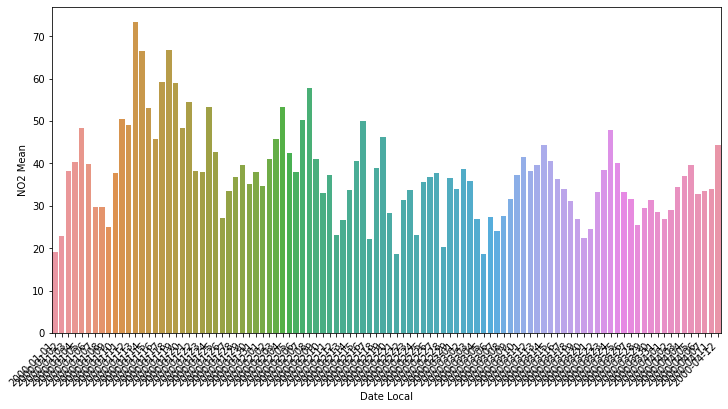

In [24]:
# new DF for address above
roosevelt = data_with_site[data_with_site['Address'] == '1645 E ROOSEVELT ST-CENTRAL PHOENIX STN']
roosevelt['Date Local'] = pd.to_datetime(roosevelt['Date Local'])

#Plotting for address above with 100 data points, because there are many dates
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.barplot(x = "Date Local", y = "NO2 Mean", data = roosevelt.head(100), ci = None, ax=ax)
x_dates = roosevelt['Date Local'].dt.strftime('%Y-%m-%d').sort_values()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [25]:
month_for_site = data_with_site['Date Local'].str[:7] # series of YYYY-MM
data_with_site_month = data_with_site  # make a copy of df with sites and dates
data_with_site_month = data_with_site_month.drop('Date Local', axis = 1) # drop the date
data_with_site_month['YYYY-MM Date'] = month_for_site # add new formatted date
data_with_site_month 

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Address,State,County,City,NO2 Units,O3 Units,SO2 Units,CO Units,YYYY-MM Date
0,19.041667,46.0,0.022500,34.0,2.987500,13.0,1.012390,25.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
4,22.958333,34.0,0.013375,27.0,1.947917,4.0,0.958333,26.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
8,38.125000,48.0,0.007958,14.0,5.225000,16.0,1.845833,28.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
12,40.260870,72.0,0.014167,28.0,7.066667,23.0,1.910417,34.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
16,48.450000,58.0,0.006667,10.0,8.704166,21.0,2.660417,42.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
20,39.950000,71.0,0.011750,21.0,6.914286,24.0,2.141123,41.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
24,29.625000,41.0,0.011625,20.0,8.652083,30.0,2.095833,40.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
28,29.666667,39.0,0.009750,17.0,8.231250,26.0,2.664583,57.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
32,25.083333,35.0,0.010792,19.0,6.487500,19.0,1.702083,32.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
36,37.666667,68.0,0.008458,13.0,9.941667,30.0,2.260417,42.0,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01


In [26]:
new_data = data_with_site_month.groupby(['Address', 'YYYY-MM Date'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# group by address and YYYY-MM Date

In [27]:
new_data['Address'] = raw_data_copy['Address']
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
new_data['City'] = raw_data_copy['City']
new_data['YYYY-MM Date'] = data_with_site_month['YYYY-MM Date']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_site_month_grouped = new_data

In [28]:
data_with_site_month_grouped = data_with_site_month_grouped.drop_duplicates()

In [29]:
data_with_site_month_grouped.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Address,State,County,City,YYYY-MM Date,NO2 Units,O3 Units,SO2 Units,CO Units
0,43.203521,64.903226,0.011238,19.193548,7.436753,23.096774,1.993244,40.096774,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01,Parts per billion,Parts per million,Parts per billion,Parts per million
124,36.495144,57.827586,0.016516,29.034483,3.874216,17.896552,1.268334,27.620690,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-02,Parts per billion,Parts per million,Parts per billion,Parts per million
240,32.916190,56.225806,0.023027,39.903226,0.560594,2.290323,0.918476,18.967742,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-03,Parts per billion,Parts per million,Parts per billion,Parts per million
364,29.062078,56.481481,0.028170,49.259259,1.586870,9.444444,1.014820,18.800000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-04,Parts per billion,Parts per million,Parts per billion,Parts per million
468,2.872158,5.888889,0.031542,56.703704,1.585462,8.555556,0.775860,15.592593,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-05,Parts per billion,Parts per million,Parts per billion,Parts per million


C:\Users\shubh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0, '2000-01'),
 Text(0, 0, '2000-02'),
 Text(0, 0, '2000-03'),
 Text(0, 0, '2000-04'),
 Text(0, 0, '2000-05'),
 Text(0, 0, '2000-06'),
 Text(0, 0, '2000-07'),
 Text(0, 0, '2000-08'),
 Text(0, 0, '2000-09'),
 Text(0, 0, '2000-10'),
 Text(0, 0, '2000-11'),
 Text(0, 0, '2000-12'),
 Text(0, 0, '2001-01'),
 Text(0, 0, '2001-02'),
 Text(0, 0, '2001-03'),
 Text(0, 0, '2001-04'),
 Text(0, 0, '2001-05'),
 Text(0, 0, '2001-06'),
 Text(0, 0, '2001-07'),
 Text(0, 0, '2001-08'),
 Text(0, 0, '2001-09'),
 Text(0, 0, '2001-10'),
 Text(0, 0, '2001-11'),
 Text(0, 0, '2001-12'),
 Text(0, 0, '2002-01'),
 Text(0, 0, '2002-02'),
 Text(0, 0, '2002-03'),
 Text(0, 0, '2002-04'),
 Text(0, 0, '2002-05'),
 Text(0, 0, '2002-06'),
 Text(0, 0, '2002-07'),
 Text(0, 0, '2002-08'),
 Text(0, 0, '2002-09'),
 Text(0, 0, '2002-10'),
 Text(0, 0, '2002-11'),
 Text(0, 0, '2002-12'),
 Text(0, 0, '2003-01'),
 Text(0, 0, '2003-02'),
 Text(0, 0, '2003-03'),
 Text(0, 0, '2003-04'),
 Text(0, 0, '2003-05'),
 Text(0, 0, '200

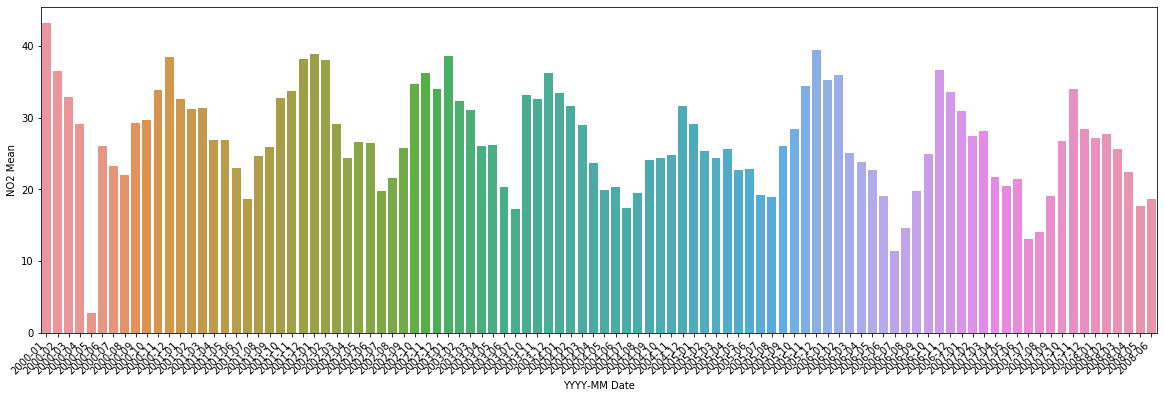

In [30]:
#a new DF for address
roosevelt_month = data_with_site_month_grouped[data_with_site_month_grouped['Address'] == '1645 E ROOSEVELT ST-CENTRAL PHOENIX STN']
roosevelt_month['YYYY-MM Date'] = pd.to_datetime(roosevelt_month['YYYY-MM Date']) #this makes date YYYY-MM-DD

#plotting 100 data points
fig_m, ax_m = plt.subplots(figsize = (20,6))
fig_m = sns.barplot(x = "YYYY-MM Date", y = "NO2 Mean", data = roosevelt_month.head(100), ci = None, ax=ax_m)
x_dates_m = roosevelt_month['YYYY-MM Date'].dt.strftime('%Y-%m').sort_values()
ax_m.set_xticklabels(labels=x_dates_m, rotation=45, ha='right')

In [31]:
data_with_city.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,County,City,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
0,19.041667,46.0,0.022500,34.0,2.987500,13.0,1.012390,25.0,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,Parts per million,Parts per billion,Parts per million
4,22.958333,34.0,0.013375,27.0,1.947917,4.0,0.958333,26.0,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,Parts per million,Parts per billion,Parts per million
8,38.125000,48.0,0.007958,14.0,5.225000,16.0,1.845833,28.0,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,Parts per million,Parts per billion,Parts per million
12,40.260870,72.0,0.014167,28.0,7.066667,23.0,1.910417,34.0,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,Parts per million,Parts per billion,Parts per million
16,48.450000,58.0,0.006667,10.0,8.704166,21.0,2.660417,42.0,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,Parts per million,Parts per billion,Parts per million


C:\Users\shubh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shubh\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[(730113.0, 730224.0)]

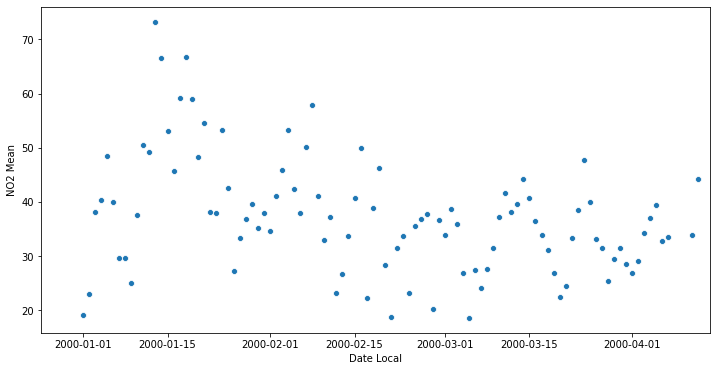

In [32]:
# plotting for phoenix
phoenix = data_with_city[data_with_city['City'] == 'Phoenix']
phoenix['Date Local'] = pd.to_datetime(phoenix['Date Local'])

#Plotting for city above with 100 data points, because there are many dates
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.scatterplot(x = "Date Local", y = "NO2 Mean", data = phoenix.head(100), ax=ax)
x_dates = phoenix['Date Local'].dt.strftime('%Y-%m-%d').sort_values()
ax.set(xlim = ('1999-12-25', '2000-04-14'))

In [33]:
month_for_city = data_with_city['Date Local'].str[:7] # series of YYYY-MM
data_with_city_month = data_with_city # make a copy of df with cities and dates
data_with_city_month = data_with_city_month.drop('Date Local', axis = 1) # drop the date column
data_with_city_month['YYYY-MM Date'] = month_for_city # add new formatted YYYY-MM Date
data_with_city_month

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,County,City,NO2 Units,O3 Units,SO2 Units,CO Units,YYYY-MM Date
0,19.041667,46.000000,0.022500,34.000000,2.987500,13.000000,1.012390,25.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
4,22.958333,34.000000,0.013375,27.000000,1.947917,4.000000,0.958333,26.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
8,38.125000,48.000000,0.007958,14.000000,5.225000,16.000000,1.845833,28.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
12,40.260870,72.000000,0.014167,28.000000,7.066667,23.000000,1.910417,34.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
16,48.450000,58.000000,0.006667,10.000000,8.704166,21.000000,2.660417,42.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
20,39.950000,71.000000,0.011750,21.000000,6.914286,24.000000,2.141123,41.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
24,29.625000,41.000000,0.011625,20.000000,8.652083,30.000000,2.095833,40.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
28,29.666667,39.000000,0.009750,17.000000,8.231250,26.000000,2.664583,57.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
32,25.083333,35.000000,0.010792,19.000000,6.487500,19.000000,1.702083,32.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
36,37.666667,68.000000,0.008458,13.000000,9.941667,30.000000,2.260417,42.000000,Arizona,Maricopa,Phoenix,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01


In [34]:
new_data = data_with_city_month.groupby(['City', 'YYYY-MM Date'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# grouped by city and YYYY-MM Date

In [35]:
#new_data['Address'] = raw_data_copy['Address'] we don't need address
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
new_data['City'] = raw_data_copy['City']
new_data['YYYY-MM Date'] = data_with_city_month['YYYY-MM Date']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_city_month_grouped = new_data

In [36]:
data_with_city_month_grouped = data_with_city_month_grouped.drop_duplicates()

In [37]:
data_with_city_month_grouped.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,County,City,YYYY-MM Date,NO2 Units,O3 Units,SO2 Units,CO Units
0,43.203521,64.903226,0.011238,19.193548,7.436753,23.096774,1.993244,40.096774,Arizona,Maricopa,Phoenix,2000-01,Parts per billion,Parts per million,Parts per billion,Parts per million
124,36.495144,57.827586,0.016516,29.034483,3.874216,17.896552,1.268334,27.620690,Arizona,Maricopa,Phoenix,2000-02,Parts per billion,Parts per million,Parts per billion,Parts per million
240,32.916190,56.225806,0.023027,39.903226,0.560594,2.290323,0.918476,18.967742,Arizona,Maricopa,Phoenix,2000-03,Parts per billion,Parts per million,Parts per billion,Parts per million
364,29.062078,56.481481,0.028170,49.259259,1.586870,9.444444,1.014820,18.800000,Arizona,Maricopa,Phoenix,2000-04,Parts per billion,Parts per million,Parts per billion,Parts per million
468,2.872158,5.888889,0.031542,56.703704,1.585462,8.555556,0.775860,15.592593,Arizona,Maricopa,Phoenix,2000-05,Parts per billion,Parts per million,Parts per billion,Parts per million


C:\Users\shubh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[(730089.0, 733224.0)]

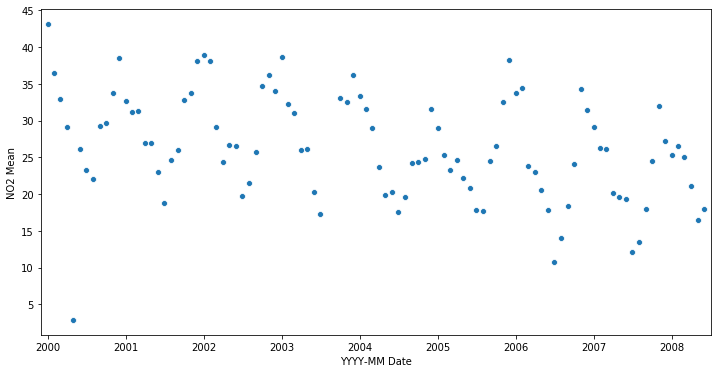

In [38]:
# plotting for phoenix
phoenix_month = data_with_city_month_grouped[data_with_city_month_grouped['City'] == 'Phoenix']
phoenix_month['YYYY-MM Date'] = pd.to_datetime(phoenix_month['YYYY-MM Date']) #this makes date YYYY-MM-DD

#Plotting for city above with 100 data points, because there are many dates
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.scatterplot(x = "YYYY-MM Date", y = "NO2 Mean", data = phoenix_month.head(100), ax=ax)
x_dates = phoenix_month['YYYY-MM Date'].dt.strftime('%Y-%m').sort_values()
ax.set(xlim = ('1999-12', '2008-07'))

In [39]:
data_with_county.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,County,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
0,33.125000,73.5,0.021125,33.5,2.365625,8.0,0.858333,20.0,Arizona,Maricopa,2000-01-01,Parts per billion,Parts per million,Parts per billion,Parts per million
4,25.520833,56.0,0.013813,25.0,1.658333,3.5,0.736458,20.5,Arizona,Maricopa,2000-01-02,Parts per billion,Parts per million,Parts per billion,Parts per million
8,50.419643,81.0,0.012125,20.5,3.120833,11.0,1.523390,23.5,Arizona,Maricopa,2000-01-03,Parts per billion,Parts per million,Parts per billion,Parts per million
12,48.255435,93.0,0.018750,33.5,3.905208,15.0,1.303125,28.0,Arizona,Maricopa,2000-01-04,Parts per billion,Parts per million,Parts per billion,Parts per million
16,76.975000,85.5,0.008667,14.5,5.175000,13.5,2.120833,34.0,Arizona,Maricopa,2000-01-05,Parts per billion,Parts per million,Parts per billion,Parts per million


C:\Users\shubh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


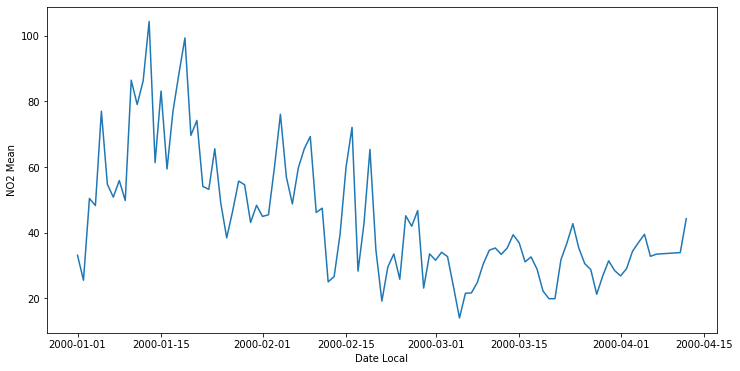

In [40]:
# new DF for address above
maricopa = data_with_county[data_with_county['County'] == 'Maricopa']
maricopa['Date Local'] = pd.to_datetime(maricopa['Date Local'])

#Plotting for county above with 100 data points, because there are many dates
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(x = "Date Local", y = "NO2 Mean", data = maricopa.head(100), ci = None, ax=ax)
x_dates = maricopa['Date Local'].dt.strftime('%Y-%m-%d').sort_values()

In [41]:
month_for_county = data_with_county['Date Local'].str[:7] # series of YYYY-MM
data_with_county_month = data_with_county # make a copy of df with sites and dates
data_with_county_month = data_with_county_month.drop('Date Local', axis = 1) #drop the date column
data_with_county_month['YYYY-MM Date'] = month_for_county # add the new formatted YYYY-MM date
data_with_county_month

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,County,NO2 Units,O3 Units,SO2 Units,CO Units,YYYY-MM Date
0,33.125000,73.500000,0.021125,33.500000,2.365625,8.000000,0.858333,20.000000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
4,25.520833,56.000000,0.013813,25.000000,1.658333,3.500000,0.736458,20.500000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
8,50.419643,81.000000,0.012125,20.500000,3.120833,11.000000,1.523390,23.500000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
12,48.255435,93.000000,0.018750,33.500000,3.905208,15.000000,1.303125,28.000000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
16,76.975000,85.500000,0.008667,14.500000,5.175000,13.500000,2.120833,34.000000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
20,54.757609,93.000000,0.018563,26.500000,3.911310,13.500000,1.646603,32.000000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
24,50.812500,80.500000,0.016104,29.000000,4.862500,18.500000,1.553125,33.500000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
28,55.875000,75.000000,0.012271,22.500000,4.523958,14.500000,1.993750,44.500000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
32,49.791666,75.500000,0.013167,24.500000,3.675000,11.000000,1.412500,28.000000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
36,86.427083,100.000000,0.013208,23.500000,5.904599,18.500000,2.083333,36.000000,Arizona,Maricopa,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01


In [42]:
new_data = data_with_county_month.groupby(['County', 'YYYY-MM Date'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# group by county and YYYY-MM date

In [43]:
#new_data['Address'] = raw_data_copy['Address'] we don't need address
new_data['State'] = raw_data_copy['State']
new_data['County'] = raw_data_copy['County']
#new_data['City'] = raw_data_copy['City'] we don't need city
new_data['YYYY-MM Date'] = data_with_county_month['YYYY-MM Date']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_county_month_grouped = new_data

In [44]:
data_with_county_month_grouped = data_with_county_month_grouped.drop_duplicates()

In [45]:
data_with_county_month_grouped.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,County,YYYY-MM Date,NO2 Units,O3 Units,SO2 Units,CO Units
0,62.018567,90.596774,0.017854,30.145161,4.773079,14.258065,1.638020,33.290323,Arizona,Maricopa,2000-01,Parts per billion,Parts per million,Parts per billion,Parts per million
124,45.279868,78.362069,0.022106,41.275862,3.123268,11.603448,1.139334,23.741379,Arizona,Maricopa,2000-02,Parts per billion,Parts per million,Parts per billion,Parts per million
240,29.607728,52.629032,0.023508,39.129032,3.480222,7.500000,0.809256,16.080645,Arizona,Maricopa,2000-03,Parts per billion,Parts per million,Parts per billion,Parts per million
364,29.062078,56.481481,0.028170,49.259259,1.586870,9.444444,1.014820,18.800000,Arizona,Maricopa,2000-04,Parts per billion,Parts per million,Parts per billion,Parts per million
468,2.872158,5.888889,0.031542,56.703704,1.585462,8.555556,0.775860,15.592593,Arizona,Maricopa,2000-05,Parts per billion,Parts per million,Parts per billion,Parts per million


C:\Users\shubh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[(730089.0, 733224.0)]

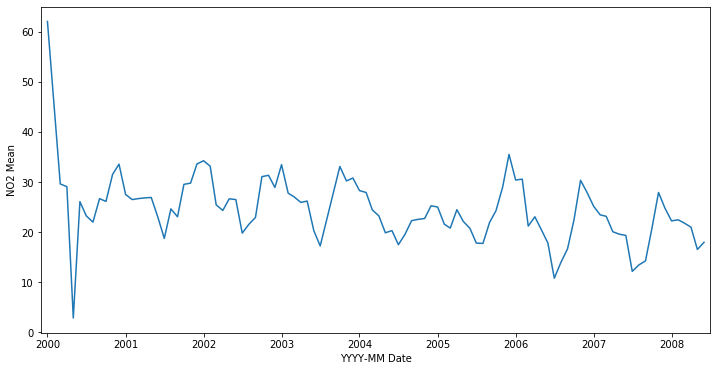

In [46]:
# plotting for maricopa
maricopa_month = data_with_county_month_grouped[data_with_county_month_grouped['County'] == 'Maricopa']
maricopa_month['YYYY-MM Date'] = pd.to_datetime(maricopa_month['YYYY-MM Date']) #this makes date YYYY-MM-DD

#Plotting for county above with 100 data points, because there are many dates
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(x = "YYYY-MM Date", y = "NO2 Mean", data = maricopa_month.head(100), ax=ax)
x_dates = maricopa_month['YYYY-MM Date'].dt.strftime('%Y-%m').sort_values()
ax.set(xlim = ('1999-12', '2008-07'))

In [47]:
month_for_state = data_with_state['Date Local'].str[:7] # series of YYYY-MM
data_with_state_month = data_with_state # make a copy of df with sites and dates
data_with_state_month = data_with_state_month.drop('Date Local', axis = 1) #drop the date column
data_with_state_month['YYYY-MM Date'] = month_for_state # add the new formatted YYYY-MM date
data_with_state_month

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,NO2 Units,O3 Units,SO2 Units,CO Units,YYYY-MM Date
0,24.166666,54.750000,0.022021,33.250000,2.094271,7.000000,0.605263,14.000000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
4,22.010417,46.000000,0.014760,25.500000,1.513542,3.250000,0.560764,14.750000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
8,50.419643,81.000000,0.012125,20.500000,3.120833,11.000000,1.523390,23.500000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
12,39.888587,66.500000,0.016084,26.250000,3.104687,10.500000,1.136384,20.500000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
16,52.758333,62.750000,0.009521,17.250000,4.123958,13.250000,1.438542,24.000000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
20,41.003804,67.000000,0.015844,26.250000,3.324405,10.250000,1.259760,24.500000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
24,40.239583,63.250000,0.014760,29.500000,3.944792,13.750000,1.282812,26.750000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
28,43.000000,60.000000,0.011823,23.750000,3.466146,10.250000,1.387500,33.250000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
32,39.708333,60.250000,0.013333,25.750000,3.706250,16.000000,1.070834,21.000000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01
36,59.588542,76.500000,0.013604,24.250000,4.718966,16.250000,1.660417,33.500000,Arizona,Parts per billion,Parts per million,Parts per billion,Parts per million,2000-01


In [48]:
new_data = data_with_county_month.groupby(['State', 'YYYY-MM Date'])[['NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']].transform('mean')
# group by state and YYYY-MM date

In [49]:
#new_data['Address'] = raw_data_copy['Address'] we don't need address
new_data['State'] = raw_data_copy['State']
#new_data['County'] = raw_data_copy['County'] we don't need county
#new_data['City'] = raw_data_copy['City'] we don't need city
new_data['YYYY-MM Date'] = data_with_state_month['YYYY-MM Date']
new_data['NO2 Units'] = raw_data_copy['NO2 Units']
new_data['O3 Units'] = raw_data_copy['O3 Units']
new_data['SO2 Units'] = raw_data_copy['SO2 Units']
new_data['CO Units'] = raw_data_copy['CO Units']
data_with_state_month_grouped = new_data

In [50]:
data_with_state_month_grouped.shape

(326754, 14)

In [51]:
data_with_state_month_grouped.drop_duplicates().shape

(7223, 14)

In [52]:
data_with_state_month_grouped = data_with_state_month_grouped.drop_duplicates()

In [53]:
data_with_state_month_grouped.head()

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,State,YYYY-MM Date,NO2 Units,O3 Units,SO2 Units,CO Units
0,45.058325,66.811475,0.015735,27.942623,4.057788,12.819672,1.183397,24.180328,Arizona,2000-01,Parts per billion,Parts per million,Parts per billion,Parts per million
124,35.733678,62.421569,0.021390,37.627451,3.048486,9.970588,0.894859,18.127451,Arizona,2000-02,Parts per billion,Parts per million,Parts per billion,Parts per million
240,25.087590,46.940678,0.025990,39.847458,2.680529,6.533898,0.620210,11.940678,Arizona,2000-03,Parts per billion,Parts per million,Parts per billion,Parts per million
364,23.836400,50.769231,0.030761,48.923077,2.068039,8.692308,0.719286,13.220000,Arizona,2000-04,Parts per billion,Parts per million,Parts per billion,Parts per million
468,8.825951,23.793103,0.035240,60.293103,2.195578,8.103448,0.538039,10.568966,Arizona,2000-05,Parts per billion,Parts per million,Parts per billion,Parts per million


In [54]:
# Templates:
#     to aggregate (group) data: 
#         new_data = df.groupby(["cols to group by"])[["cols to be aggregated"]].transform("function to aggregate (such as mean, max, etc)")
    
#     then add appropriate cols to new data:
#         for example:
#                 new_data['Address'] = raw_data_copy['Address']
#                 new_data['State'] = raw_data_copy['State']
#                 new_data['County'] = raw_data_copy['County']
#                 new_data['City'] = raw_data_copy['City']
#                 new_data['YYYY-MM Date'] = data_with_site_month['YYYY-MM Date']
#                 new_data['NO2 Units'] = raw_data_copy['NO2 Units']
#                 new_data['O3 Units'] = raw_data_copy['O3 Units']
#                 new_data['SO2 Units'] = raw_data_copy['SO2 Units']
#                 new_data['CO Units'] = raw_data_copy['CO Units']
#                 grouped_df = new_data
    
#     then drop duplicates because aggregation will produce identical values in "cols to be aggregated":
#         grouped_df = grouped_df.drop_duplicates()
        
#     you can check the change in number of rows by removing duplicates by checking grouped_df.shape before
#     and after dropping
    
#     Plotting:
#         (site/city/county/state)name_month = data_with_(site/city/county/state)_month_grouped[data_with_(site/city/county/state)_month_grouped
#                                                                                                   ['Address/City/County/State'] == 'address/city/county/state name']
#         (site/city/county/state)name_month['Date Local / YYYY-MM Date'] = pd.to_datetime((site/city/county/state)name_month['Date Local / YYYY-MM Date']) #this makes date YYYY-MM-DD
        
#             Barplots:
#                 fig, ax = plt.subplots(figsize = (20,6))
#                 fig = sns.barplot(x = "Date Local / YYYY-MM Date", y = "col to be plotted", data = (site/city/county/state)name_month.head(100), ci = None, ax=ax)
#                 x_dates = (site/city/county/state)name_month['Date Local / YYYY-MM Date'].dt.strftime('%Y-%m-%D / %Y-%m').sort_values()
#                 ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
            
#             Scatterplots:
#                 fig, ax = plt.subplots(figsize = (12,6))
#                 fig = sns.scatterplot(x = "Date Local / YYYY-MM Date", y = "col to be plotted", data = (site/city/county/state)name_month.head(100), ax=ax)
#                 x_dates = (site/city/county/state)name_month['Date Local / YYYY-MM Date'].dt.strftime('%Y-%m-%D / %Y-%m').sort_values()
#                 ax.set(xlim = ('start date', 'end date'))
                
#             Lineplots:
#                 fig, ax = plt.subplots(figsize = (12,6))
#                 fig = sns.lineplot(x = "Date Local / YYYY-MM Date", y = "col to be plotted", data = maricopa_month.head(100), ax=ax)
#                 x_dates = maricopa_month['Date Local / YYYY-MM Date'].dt.strftime('%Y-%m-%D / %Y-%m').sort_values()
#                 ax.set(xlim = ('start date', 'end date'))
    